<a href="https://colab.research.google.com/github/ultralegendshubh/CNN_FASHIONMIST/blob/main/CNN_FASHIONMIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns
from sklearn.model_selection import train_test_split

import keras
from keras.datasets import fashion_mnist

# Loading The Data sets
  

In [ ]:
(x_train, y_train),(x_test, y_test) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [ ]:
x_train.shape, y_train.shape

((60000, 28, 28), (60000,))

In [ ]:
x_test.shape, y_test.shape

((10000, 28, 28), (10000,))

In [ ]:
## lets see an image how it looks like
## 0 : represent absence of light
## 255 : which represent presnce of light
## 128 : inbetween number are the shades of white and black

x_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,
          0,   0,  13,  73,   0,   0,   1,   4,   0,   0,   0,   0,   1,
          1,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
          0,  36, 136, 127,  62,  54,   0,   0,   0,   1,   3,   4,   0,
          0,   3],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6,
          0, 102, 204, 176, 134, 144, 123,  23,   0,   0,   0,   0,  12,
         10,   0],
       [  

In [ ]:
y_train[1]

0

In [ ]:
"""
Data Labels as follows

0: T-shirt/top
1: Trouser
2: Pullover
3: Dress
4: Coat
5: Sandal
6: Shirt
7: Sneaker
8: Bag
9: Ankle boot

"""

'\nData Labels as follows\n\n0: T-shirt/top\n1: Trouser\n2: Pullover\n3: Dress\n4: Coat\n5: Sandal\n6: Shirt\n7: Sneaker\n8: Bag\n9: Ankle boot\n\n'

In [ ]:
class_labels = ["T-shirt/top","Trouser","Pullover","Dress","Coat","Sandal","Shirt","Sneaker","Bag","Ankle boot"]

In [ ]:
len(class_labels)

10

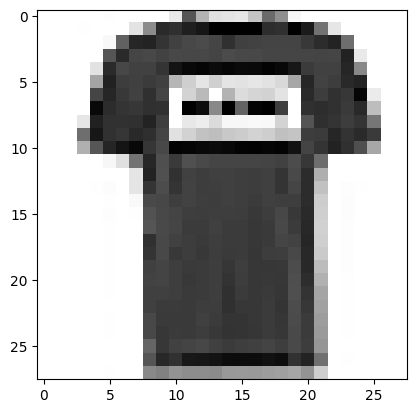

In [ ]:
## in order to visuallize image plt.imshow() is the function

plt.imshow(x_train[1], cmap = "Greys")

In [ ]:
x_train.ndim

3

In [ ]:
# Expanding the dim
x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)

In [ ]:
x_train.shape, x_train.ndim

((60000, 28, 28, 1), 4)

## Scaling of Images inorder to have early convergence

In [ ]:
# Min Max Scaler

x_train = x_train/255
x_test = x_test/255

In [ ]:
x_train[0]

array([[[0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ]],

       [[0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        

In [ ]:
# Spliting the Data

x_train,x_val,y_train,y_val = train_test_split(
                                                  x_train,
                                                  y_train,
                                                  test_size = 0.2,
                                                  random_state =42
)

In [ ]:
x_train.shape, x_test.shape , x_val.shape

((48000, 28, 28, 1), (10000, 28, 28, 1), (12000, 28, 28, 1))

# Architecture Buliding CNN


In [ ]:
model = keras.models.Sequential([

    keras.layers.Conv2D(filters = 32, kernel_size = 3, strides = (1,1), padding= "Valid", activation = "relu", input_shape = [28,28,1]),
    keras.layers.MaxPooling2D(pool_size = (2,2)),
    keras.layers.Flatten(),
    keras.layers.Dense(units = 128, activation = "relu"),
    keras.layers.Dense(units = 10, activation = "softmax")

])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 flatten (Flatten)           (None, 5408)              0         
                                                                 
 dense (Dense)               (None, 128)               692352    
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 693962 (2.65 MB)
Trainable params: 693962 (2.65 MB)
Non-trainable params: 0 (0.00 Byte)
____________________

In [ ]:
model.compile(
                 optimizer = "adam",
                 loss = "sparse_categorical_crossentropy",
                 metrics = ["accuracy"]
)

In [ ]:
model.fit(
         x_train,
         y_train,
         epochs = 30,
         batch_size = 512,
         verbose = True,
         validation_data = (x_val, y_val )
)

Epoch 1/30
94/94 [==============================] - 11s 13ms/step - loss: 0.6457 - accuracy: 0.7824 - val_loss: 0.4210 - val_accuracy: 0.8503
Epoch 2/30
94/94 [==============================] - 1s 9ms/step - loss: 0.3748 - accuracy: 0.8698 - val_loss: 0.3451 - val_accuracy: 0.8802
Epoch 3/30
94/94 [==============================] - 1s 9ms/step - loss: 0.3272 - accuracy: 0.8852 - val_loss: 0.3234 - val_accuracy: 0.8846
Epoch 4/30
94/94 [==============================] - 1s 7ms/step - loss: 0.2959 - accuracy: 0.8959 - val_loss: 0.2947 - val_accuracy: 0.8949
Epoch 5/30
94/94 [==============================] - 1s 8ms/step - loss: 0.2754 - accuracy: 0.9022 - val_loss: 0.2888 - val_accuracy: 0.8967
Epoch 6/30
94/94 [==============================] - 1s 8ms/step - loss: 0.2585 - accuracy: 0.9068 - val_loss: 0.2759 - val_accuracy: 0.8994
Epoch 7/30
94/94 [==============================] - 1s 7ms/step - loss: 0.2413 - accuracy: 0.9143 - val_loss: 0.2808 - val_accuracy: 0.8989
Epoch 8/30
94/94 [

## Testing the Model

In [ ]:
model.predict(np.expand_dims(x_test[1],0)).round(2)

1/1 [==============================] - 0s 108ms/step


array([[0., 0., 1., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [ ]:
y_test[1]

2

In [ ]:
y_pred = model.predict(x_test).round(2)

313/313 [==============================] - 1s 4ms/step


In [ ]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.2825 - accuracy: 0.9147


[0.28254327178001404, 0.9146999716758728]

<Axes: >

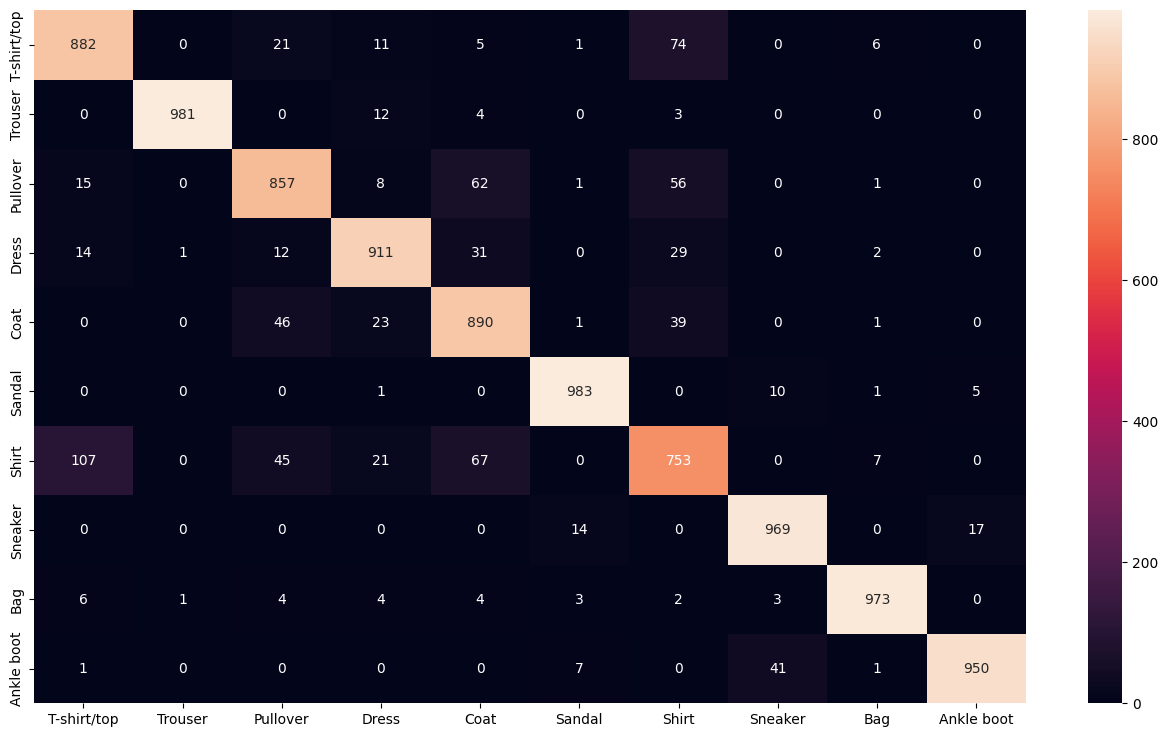

In [ ]:
from sklearn.metrics import confusion_matrix

plt.figure(figsize = (16,9))
y_pred_labels =[np.argmax(label) for label in y_pred]

cnf = confusion_matrix(y_test, y_pred_labels)

sns.heatmap(cnf,
            annot= True,
            fmt = "d",
            xticklabels = class_labels,
            yticklabels = class_labels)